# Dependências e Blibiotecas

In [4]:
# Instalando dependências
pip install scikit-learn

SyntaxError: invalid syntax (1579727049.py, line 2)

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Setando o DataSet

### Transformando o CSV em DataFrame

In [2]:
# Setando o df
file_path = "wildfires.csv"
df = pd.read_csv(file_path)

C:\Users\edu_m\AppData\Local\Temp\ipykernel_4968\3551701689.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Separando os 500.000 mil dados usando a seed aleátoria

In [7]:
# Carregar a amostra de 500.000 linhas do dataframe usando um seed fixo
random_seed = 17
sample_df = df.sample(n=500_000, random_state=random_seed, replace=False)
display(sample_df)

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
1848461,300276841,1076 STOCKADE RANCH RD.,2015,10/17/2015,290,Human,Missing data/not specified/undetermined,NaN,NaN,1.00,B,30.160700,-97.090400,TX
1805846,300221337,NaN,2015,7/19/2015,200,Natural,Natural,7/19/2015,200.0,45.00,C,34.496853,-80.195381,SC
212871,215915,BLACK,1995,10/26/1995,299,Human,Missing data/not specified/undetermined,10/26/1995,299.0,2.00,B,35.566700,-114.584100,AZ
1818187,300237705,NaN,2015,2/8/2015,39,Human,Debris and open burning,2/8/2015,39.0,3.00,B,34.049999,-80.483330,SC
1321981,1801969,PEXTONA,1997,2/24/1997,55,Human,Arson/incendiarism,2/24/1997,55.0,5.00,B,38.144591,-81.688809,WV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018973,400148372,ROBINS,2017,8/8/2017,220,Human,Missing data/not specified/undetermined,8/8/2017,220.0,1.00,B,48.027800,-114.067700,MT
1014153,1144074,NaN,1995,4/15/1995,105,Human,Misuse of fire by a minor,NaN,NaN,2.00,B,35.825000,-77.745000,NC
1659279,201820253,KATHERINE,2013,11/3/2013,307,Human,Missing data/not specified/undetermined,11/3/2013,307.0,0.10,A,41.201873,-122.274025,CA
1403105,19100257,NaN,1997,3/13/1997,72,Human,Misuse of fire by a minor,3/13/1997,72.0,0.39,B,31.755000,-81.613300,GA


# Tratamento de dados

### Tratamento de duplicados

In [8]:
# Removendo duplicatas
sample_df = sample_df.drop_duplicates()

### Tratamento e padronização dos dados data

In [9]:
# Tratamento e padronização das colunas de data
sample_df['DISCOVERY_DATE'] = pd.to_datetime(sample_df['DISCOVERY_DATE'], errors='coerce')
sample_df['CONT_DATE'] = pd.to_datetime(sample_df['CONT_DATE'], errors='coerce')

### Reconhecimento e padronização dos dados nulos

In [10]:
# Reconhecendo quais colunas possuem dados nulos e quais não tem
print(sample_df.isnull().sum())

FOD_ID                            0
FIRE_NAME                    215825
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                    194294
CONT_DOY                     194294
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
dtype: int64


In [11]:
# Tratamendo dos valores nulos das colunas identificadas anteirormente
sample_df['FIRE_NAME'] = sample_df['FIRE_NAME'].fillna('Foguinho Desconhecido')
sample_df['CONT_DATE'] = sample_df['CONT_DATE'].fillna('000-00-00')
sample_df['CONT_DOY'] = sample_df['CONT_DOY'].fillna(0)

### Tratando os dados CONT_DOY para padroniza-los em inteiros

In [12]:
# Padronizando o formato de dados da CONT_DOY para inteiro igual a coluna DISCOVERY_DOY
sample_df['CONT_DOY'] = sample_df['CONT_DOY'].astype(int)

### Tratamento de outliners

In [13]:
# Tratamento de outliers
Q1 = sample_df['FIRE_SIZE'].quantile(0.25)
Q3 = sample_df['FIRE_SIZE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sample_df = sample_df[(sample_df['FIRE_SIZE'] >= lower_bound) & (sample_df['FIRE_SIZE'] <= upper_bound)]

### DataFrame pos tratamento de dados

In [14]:
# Monstrando o dataframe amostrado após os tratamentos
display(sample_df)

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
1848461,300276841,1076 STOCKADE RANCH RD.,2015,2015-10-17,290,Human,Missing data/not specified/undetermined,000-00-00,0,1.00,B,30.160700,-97.090400,TX
212871,215915,BLACK,1995,1995-10-26,299,Human,Missing data/not specified/undetermined,1995-10-26 00:00:00,299,2.00,B,35.566700,-114.584100,AZ
1818187,300237705,Foguinho Desconhecido,2015,2015-02-08,39,Human,Debris and open burning,2015-02-08 00:00:00,39,3.00,B,34.049999,-80.483330,SC
1321981,1801969,PEXTONA,1997,1997-02-24,55,Human,Arson/incendiarism,1997-02-24 00:00:00,55,5.00,B,38.144591,-81.688809,WV
1833610,300257276,MINDEN RD,2015,2015-04-12,102,Human,Arson/incendiarism,2015-04-12 00:00:00,102,0.20,A,37.980068,-81.133806,WV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018973,400148372,ROBINS,2017,2017-08-08,220,Human,Missing data/not specified/undetermined,2017-08-08 00:00:00,220,1.00,B,48.027800,-114.067700,MT
1014153,1144074,Foguinho Desconhecido,1995,1995-04-15,105,Human,Misuse of fire by a minor,000-00-00,0,2.00,B,35.825000,-77.745000,NC
1659279,201820253,KATHERINE,2013,2013-11-03,307,Human,Missing data/not specified/undetermined,2013-11-03 00:00:00,307,0.10,A,41.201873,-122.274025,CA
1403105,19100257,Foguinho Desconhecido,1997,1997-03-13,72,Human,Misuse of fire by a minor,1997-03-13 00:00:00,72,0.39,B,31.755000,-81.613300,GA


# Testes de intervalo de confiança

### Causa vs Tamanho do Fogo

,NWCG_CAUSE_CLASSIFICATION,media_FIRE_SIZE,limite_inferior,limite_superior,n_observacao
0,Human,1.175801,1.170504,1.181099,326939
1,Missing data/not specified/undetermined,1.091031,1.075356,1.106705,35576
2,Natural,0.711961,0.701559,0.722364,59958


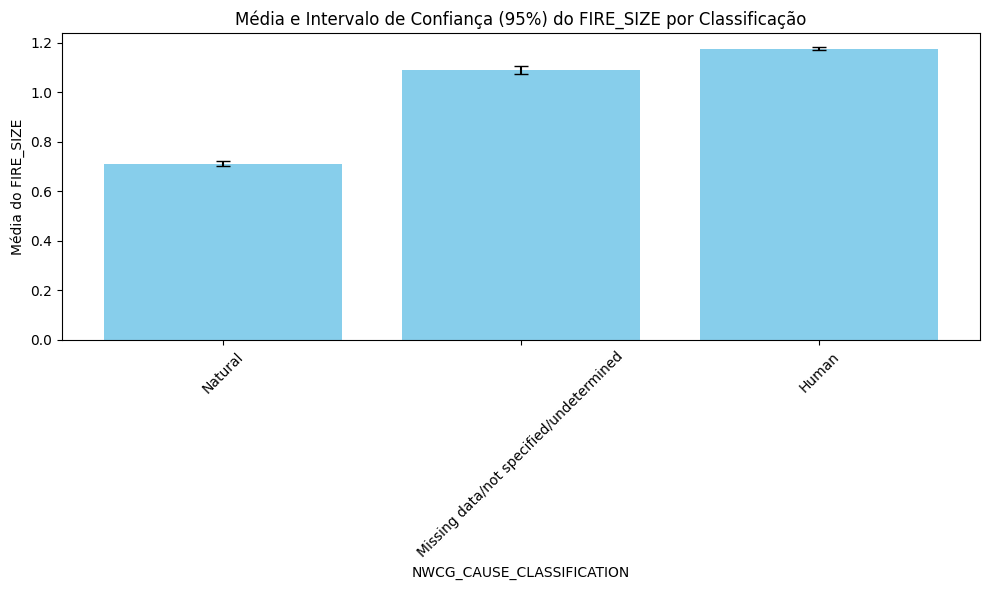

In [15]:
# Realizando o teste de Intervalo de Confiança para a média do tamanho do fogo agrupada por causa
grouped = sample_df.groupby('NWCG_CAUSE_CLASSIFICATION')['FIRE_SIZE']

results = []
for name, group in grouped:
    n = group.count()
    mean = group.mean()
    std = group.std()
    conf_int = stats.t.interval(
        confidence=0.95, 
        df=n-1, 
        loc=mean, 
        scale=std/np.sqrt(n)
    )
    results.append({
        'NWCG_CAUSE_CLASSIFICATION': name,
        'media_FIRE_SIZE': mean,
        'limite_inferior': conf_int[0],
        'limite_superior': conf_int[1],
        'n_observacao': n
    })

conf_df_size_cause = pd.DataFrame(results)
display(conf_df_size_cause)

# Plotando o gráfico de barras com intervalo de confiança tamanho do fogo por causa
conf_df_size_cause_sorted = conf_df_size_cause.sort_values('media_FIRE_SIZE')

# Plot
plt.figure(figsize=(10,6))
plt.bar(
    conf_df_size_cause_sorted['NWCG_CAUSE_CLASSIFICATION'],
    conf_df_size_cause_sorted['media_FIRE_SIZE'],
    yerr=[
        conf_df_size_cause_sorted['media_FIRE_SIZE'] - conf_df_size_cause_sorted['limite_inferior'],
        conf_df_size_cause_sorted['limite_superior'] - conf_df_size_cause_sorted['media_FIRE_SIZE']
    ],
    capsize=5,
    color='skyblue'
)
plt.ylabel('Média do FIRE_SIZE')
plt.xlabel('NWCG_CAUSE_CLASSIFICATION')
plt.title('Média e Intervalo de Confiança (95%) do FIRE_SIZE por Classificação')
plt.xticks(rotation=45)
plt.tight_layout()

### Estado vs Tamanho do Fogo

,STATE,media_FIRE_SIZE,limite_inferior,limite_superior,n_observacao
0,AK,0.627011,0.579693,0.674328,2539
1,AL,2.046180,2.010711,2.081649,11050
2,AR,2.324626,2.278872,2.370380,5664
3,AZ,0.505361,0.491240,0.519481,20998
4,CA,0.668732,0.658885,0.678579,50748


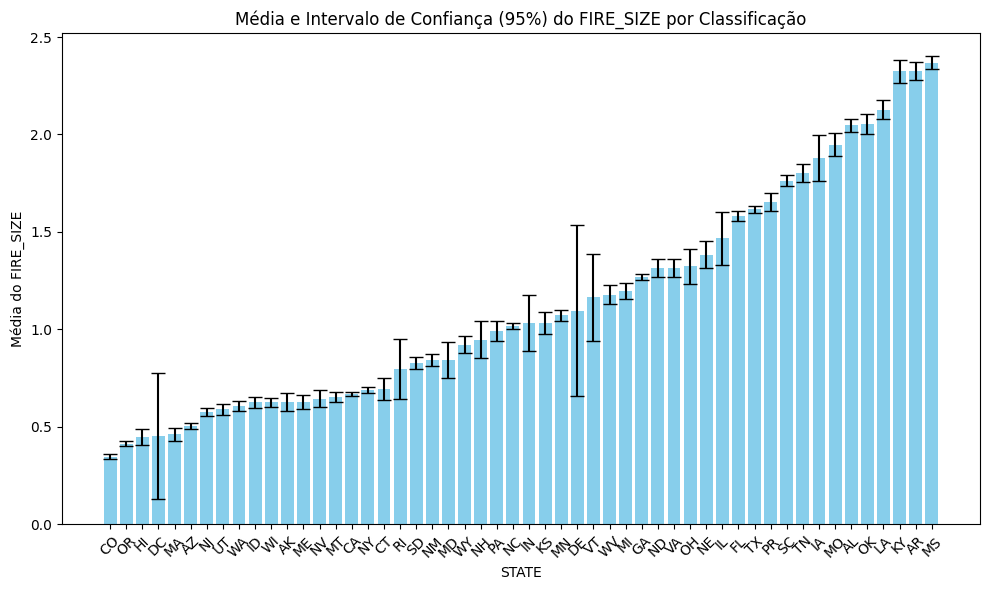

In [17]:
# Realizando o teste de Intervalo de Confiança para a média do tamanho do fogo agrupada por estado
grouped = sample_df.groupby('STATE')['FIRE_SIZE']

results = []
for name, group in grouped:
    n = group.count()
    mean = group.mean()
    std = group.std()
    conf_int = stats.t.interval(
        confidence=0.95, 
        df=n-1, 
        loc=mean, 
        scale=std/np.sqrt(n)
    )
    results.append({
        'STATE': name,
        'media_FIRE_SIZE': mean,
        'limite_inferior': conf_int[0],
        'limite_superior': conf_int[1],
        'n_observacao': n
    })

conf_df_size_state = pd.DataFrame(results)
display(conf_df_size_state.head())

# Plotando o gráfico de barras com intervalo de confiança tamanho do fogo por estado
conf_df_size_state_sorted = conf_df_size_state.sort_values('media_FIRE_SIZE')

# Plot
plt.figure(figsize=(10,6))
plt.bar(
    conf_df_size_state_sorted['STATE'],
    conf_df_size_state_sorted['media_FIRE_SIZE'],
    yerr=[
        conf_df_size_state_sorted['media_FIRE_SIZE'] - conf_df_size_state_sorted['limite_inferior'],
        conf_df_size_state_sorted['limite_superior'] - conf_df_size_state_sorted['media_FIRE_SIZE']
    ],
    capsize=5,
    color='skyblue'
)
plt.ylabel('Média do FIRE_SIZE')
plt.xlabel('STATE')
plt.title('Média e Intervalo de Confiança (95%) do FIRE_SIZE por Classificação')
plt.xticks(rotation=45)
plt.tight_layout()

# Testes de hipótese

### Causa vs Tamanho do Fogo

Estatística do teste: -77.87817514941347
Valor-p: 0.0
Rejeita-se H0: As médias são diferentes com 95% de confiança.


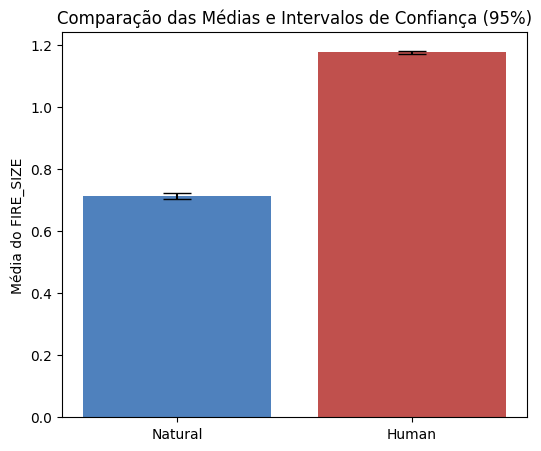

In [18]:
# Seleção de amostra para o teste t
grupo1 = sample_df[sample_df['NWCG_CAUSE_CLASSIFICATION'] == 'Natural']['FIRE_SIZE']
grupo2 = sample_df[sample_df['NWCG_CAUSE_CLASSIFICATION'] == 'Human']['FIRE_SIZE']

# Realizando o teste t de Student para duas amostras independentes
stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)

# Exibindo os resultados do teste t
print(f'Estatística do teste: {stat}')
print(f'Valor-p: {p_value}')

# Interpretação do valor-p
if p_value < 0.05:
    print("Rejeita-se H0: As médias são diferentes com 95% de confiança.")
else:
    print("Não rejeita H0: Não há evidência de diferença nas médias.")

# Plotando o gráfico de barras do resultado do teste t
means = [grupo1.mean(), grupo2.mean()]
stds = [grupo1.std(), grupo2.std()]
ns = [grupo1.count(), grupo2.count()]
conf_intervals = [stats.t.interval(
    confidence=0.95, 
    df=n-1, 
    loc=mean, 
    scale=std/np.sqrt(n)
) for mean, std, n in zip(means, stds, ns)]

lower_errors = [mean - ci[0] for mean, ci in zip(means, conf_intervals)]
upper_errors = [ci[1] - mean for mean, ci in zip(means, conf_intervals)]

labels = ['Natural', 'Human']
plt.figure(figsize=(6,5))
plt.bar(labels, means, yerr=[lower_errors, upper_errors], capsize=10, color=['#4F81BD', '#C0504D'])
plt.ylabel('Média do FIRE_SIZE')
plt.title('Comparação das Médias e Intervalos de Confiança (95%)')
plt.show()

# Testes de regressão linear

### Causa vs Tamanho do Fogo

R² no conjunto de teste: 0.0117
                                     Causa  Coeficiente
0                                    Human     0.181081
1  Missing data/not specified/undetermined     0.099501
2                                  Natural    -0.280582


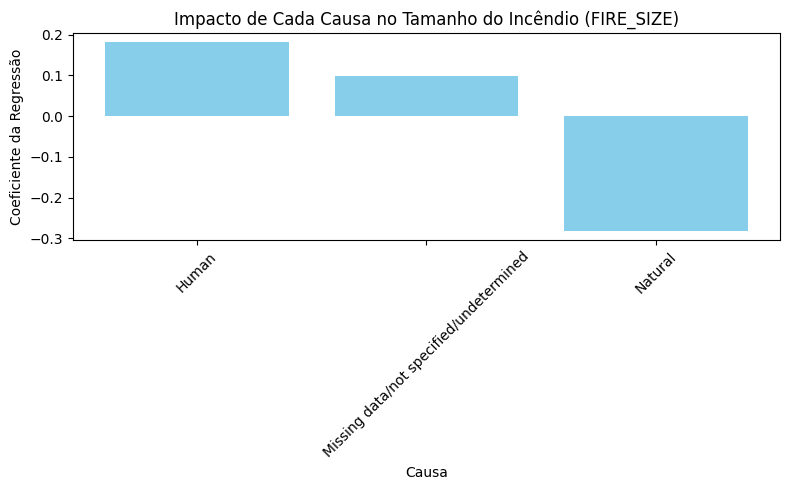

In [ ]:
# Transformando a causa em variáveis dummies ou seja usaveis para regressão
X = pd.get_dummies(sample_df['NWCG_CAUSE_CLASSIFICATION'])
y = sample_df['FIRE_SIZE']

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliando o modelo
score = model.score(X_test, y_test)
print(f'R² no conjunto de teste: {score:.4f}')

# Coeficientes
coef_df = pd.DataFrame({'Causa': X.columns, 'Coeficiente': model.coef_})
print(coef_df)

# Gráfico dos coeficientes
plt.figure(figsize=(8,5))
plt.bar(coef_df['Causa'], coef_df['Coeficiente'], color='skyblue')
plt.ylabel('Coeficiente da Regressão')
plt.xlabel('Causa')
plt.title('Impacto de Cada Causa no Tamanho do Incêndio (FIRE_SIZE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Estado vs Tamanho do Fogo

R² no conjunto de teste: 0.1358
   Estado  Coeficiente
0      AK    -0.504606
1      AL     0.930517
2      AR     1.216960
3      AZ    -0.629603
4      CA    -0.461766
5      CO    -0.794568
6      CT    -0.436685
7      DC    -0.653508
8      DE     0.004379
9      FL     0.451516
10     GA     0.127552
11     HI    -0.670602
12     IA     0.829179
13     ID    -0.505619
14     IL     0.318660
15     IN    -0.089816
16     KS    -0.105245
17     KY     1.184164
18     LA     0.985672
19     MA    -0.696698
20     MD    -0.258404
21     ME    -0.515386
22     MI     0.074189
23     MN    -0.072267
24     MO     0.845439
25     MS     1.235930
26     MT    -0.479168
27     NC    -0.124906
28     ND     0.180020
29     NE     0.262617
30     NH    -0.160487
31     NJ    -0.553794
32     NM    -0.297580
33     NV    -0.490753
34     NY    -0.448372
35     OH     0.132020
36     OK     0.897896
37     OR    -0.719920
38     PA    -0.146594
39     PR     0.525727
40     RI    -0.309711
41

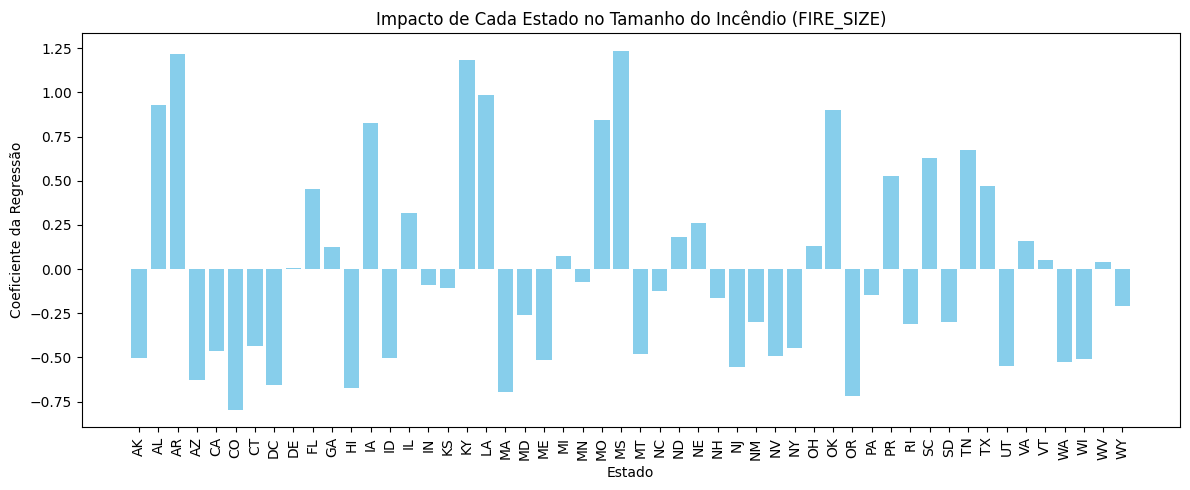

In [ ]:
# Transformando o estados em variáveis dummies ou seja usaveis para regressão
X = pd.get_dummies(sample_df['STATE'])
y = sample_df['FIRE_SIZE']

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliando o modelo
score = model.score(X_test, y_test)
print(f'R² no conjunto de teste: {score:.4f}')

# Coeficientes por estado
coef_df = pd.DataFrame({'Estado': X.columns, 'Coeficiente': model.coef_})
print(coef_df)

# Gráfico dos coeficientes
plt.figure(figsize=(12,5))
plt.bar(coef_df['Estado'], coef_df['Coeficiente'], color='skyblue')
plt.ylabel('Coeficiente da Regressão')
plt.xlabel('Estado')
plt.title('Impacto de Cada Estado no Tamanho do Incêndio (FIRE_SIZE)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Estação vs Tamanho do Fogo

R² no conjunto de teste: 0.0314
     Estação  Coeficiente
0    Inverno     0.373776
1     Outono    -0.021060
2  Primavera    -0.013584
3      Verão    -0.339132


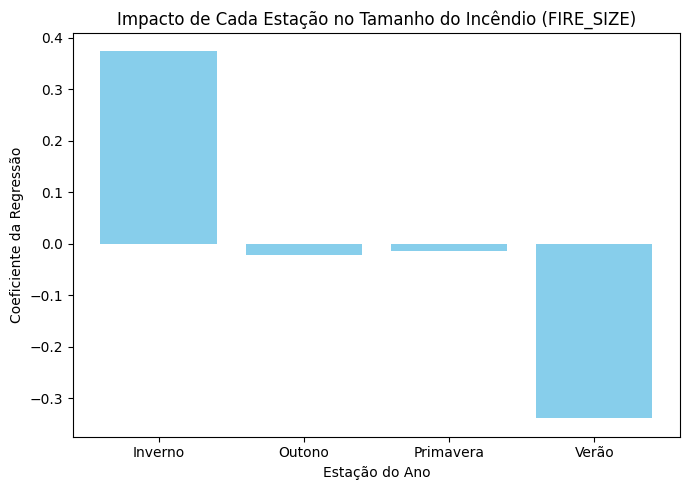

In [ ]:
# Transformando a coluna DISCOVERY_DOY em estações do ano
def get_season(doy):
    if 80 <= doy < 172:
        return 'Primavera'
    elif 172 <= doy < 264:
        return 'Verão'
    elif 264 <= doy < 355:
        return 'Outono'
    else:
        return 'Inverno'

# Aplicando a função para criar a coluna SEASON
sample_df['SEASON'] = sample_df['DISCOVERY_DOY'].apply(get_season)

# Transformando as estações em variáveis dummies ou seja usaveis para regressão
X = pd.get_dummies(sample_df['SEASON'])
y = sample_df['FIRE_SIZE']

# Criando e treinando o modelo de regressão linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes por estação
score = model.score(X_test, y_test)
print(f'R² no conjunto de teste: {score:.4f}')
coef_df = pd.DataFrame({'Estação': X.columns, 'Coeficiente': model.coef_})
print(coef_df)

# Gráfico dos coeficientes
plt.figure(figsize=(7,5))
plt.bar(coef_df['Estação'], coef_df['Coeficiente'], color='skyblue')
plt.ylabel('Coeficiente da Regressão')
plt.xlabel('Estação do Ano')
plt.title('Impacto de Cada Estação no Tamanho do Incêndio (FIRE_SIZE)')
plt.tight_layout()
plt.show()

### Estado vs Causa

R² multivariado no conjunto de teste: 0.2289
       Human  Missing data/not specified/undetermined   Natural
AK  0.011069                                -0.071010  0.059941
AL  0.205837                                -0.099980 -0.105858
AR  0.023129                                 0.038899 -0.062029
AZ -0.250283                                 0.069310  0.180974
CA -0.055429                                 0.056094 -0.000665
CO -0.258059                                 0.030033  0.228027
CT  0.158033                                -0.042338 -0.115695
DC  0.220801                                -0.101667 -0.119134
DE -0.190963                                 0.280686 -0.089722
FL  0.004116                                -0.098365  0.094249
GA  0.175763                                -0.101528 -0.074236
HI -0.768053                                 0.884091 -0.116038
IA -0.171472                                 0.290606 -0.119134
ID -0.418455                                -0.100362  0.51

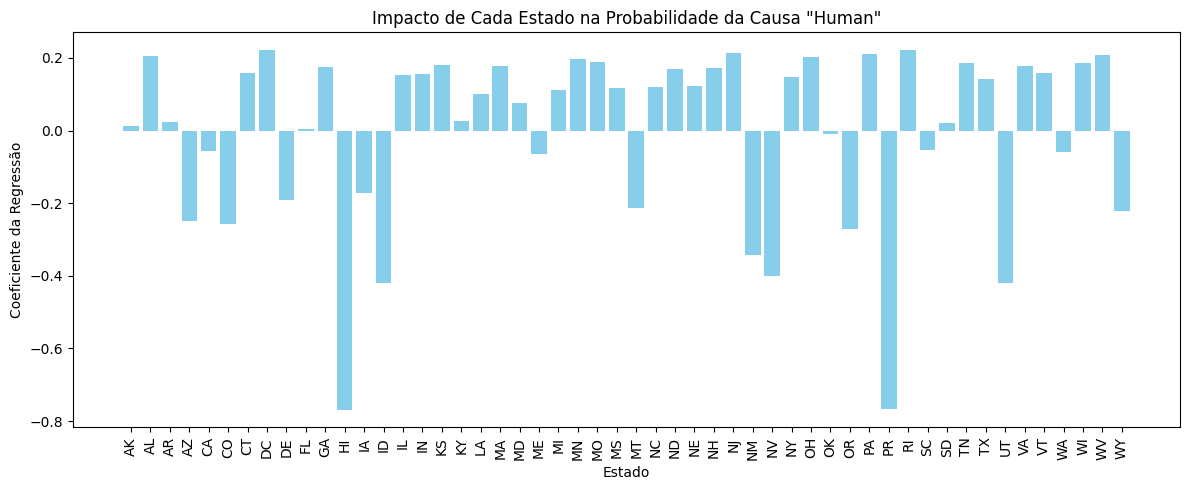

In [21]:
# Regressão linear entre estado e causa (ambos como dummies)
X = pd.get_dummies(sample_df['STATE'])
y = pd.get_dummies(sample_df['NWCG_CAUSE_CLASSIFICATION'])

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear multivariada
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliando o modelo
score = model.score(X_test, y_test)
print(f'R² multivariado no conjunto de teste: {score:.4f}')

# Coeficientes: DataFrame com estados como índice e causas como colunas
coef_df = pd.DataFrame(model.coef_.T, columns=y.columns, index=X.columns)
print(coef_df)

# Exemplo de visualização: coeficientes para uma causa específica
causa_escolhida = y.columns[0]  # escolha uma causa, ex: 'Human'
plt.figure(figsize=(12,5))
plt.bar(coef_df.index, coef_df[causa_escolhida], color='skyblue')
plt.ylabel('Coeficiente da Regressão')
plt.xlabel('Estado')
plt.title(f'Impacto de Cada Estado na Probabilidade da Causa "{causa_escolhida}"')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()